<style>
r { color: Red }
o { color: Orange }
g { color: Green }
</style>
# <r>Mean Value</r> Theorem

If a function is continuous on the closed interval $ [a, b] $ and differentiable on the open interval $ (a, b) $, then there exists at least one point $ c $ in  $ (a, b) $ such that:

$ f'(c) = \frac{f(b) - f(a)}{b - a} $

This theorem essentially states that there is at least one point in the interval where the instantaneous rate of change (the derivative) equals the average rate of change over the interval.

Or, in other words, there exists a point $ c $ in $ (a, b) $ such that the tangent line at that point is parallel to the secant line connecting the endpoints of the interval.

In [13]:
# Let's first check what matplotlib backends are available
import matplotlib
print("Current backend:", matplotlib.get_backend())

# Use widget backend for interactive plots in notebooks (works in headless environments)
%matplotlib widget

# import the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from sympy import symbols, lambdify, diff, simplify, parse_expr, latex
from IPython.display import display, Markdown as md

print("Successfully set widget backend for interactive plotting!")
print("New backend:", matplotlib.get_backend())
print("Figures will be interactive within the notebook.")

Current backend: widget
Successfully set widget backend for interactive plotting!
New backend: widget
Figures will be interactive within the notebook.


<style>
r { color: Red }
o { color: Orange }
g { color: Green }
</style>

## Define the function and the interval

- <r>functionString</r> is the function we want to analyze.
- $[ a, b ]$ is the interval we are interested in.
- <r>a</r> and <r>b</r> are the endpoints of the interval.

In [14]:
functionString = "3*x**2 + 6*x - 5"

# define the interval
a = -2
b = 1

# parse the function string to a sympy expression
f = parse_expr(functionString, evaluate=False)

# Create the styled markdown with proper CSS
style_css = """
<style>
r { color: Red }
o { color: Orange }
g { color: Green }
</style>
"""

function_display = "### <r> $ f(x) = {} $ </r>".format(latex(f))
interval_display = "### Interval: <r> [ {}, {} ] </r>".format(a, b)

md(style_css + 
   function_display + 
   # new line
    "\n" +
   interval_display)


<style>
r { color: Red }
o { color: Orange }
g { color: Green }
</style>
### <r> $ f(x) = 3 x^{2} + 6 x - 5 $ </r>
### Interval: <r> [ -2, 1 ] </r>

## Plot the function and highlight the interval

In [15]:
%%capture domain_output
# define the domain for plotting
startPoint = a - 1
endPoint = b + 1
step = 0.001
domain = np.arange(startPoint, endPoint, step)
domain = np.array(domain, dtype=np.float64)
# domain should have only 3 decimal places
domain = np.round(domain, 3)

# display the domain
print("x:", domain)
# print(f"Domain has {len(domain)} points")
# print(f"Domain range: {domain[0]} to {domain[-1]}")

# simplify the function
fs = simplify(f)
# define x as a symbol
x = symbols('x')
# lamdify the function for numerical evaluation
fl = lambdify(x, fs, modules='numpy')

# calculate the y values for the function
y = fl(domain)
# y should have only 3 decimal places
y = np.round(y, 3)
print("y:", y)


In [16]:
print(domain_output.stdout)

x: [-3.    -2.999 -2.998 ...  1.997  1.998  1.999]
y: [ 4.     3.988  3.976 ... 18.946 18.964 18.982]



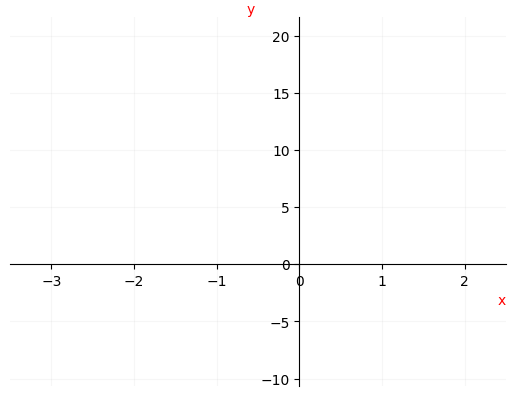

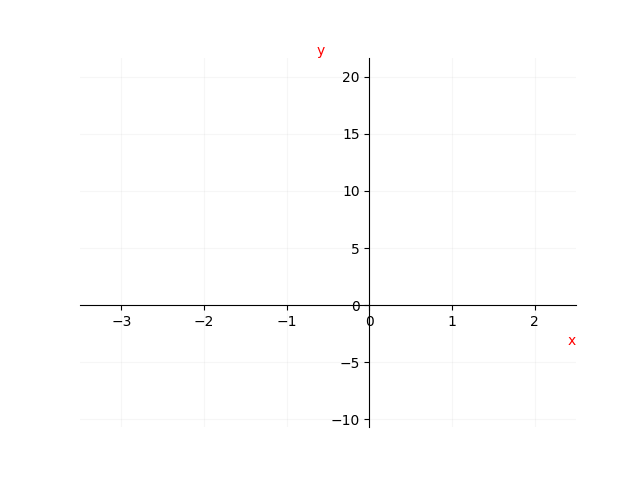

In [17]:
fig, ax = plt.subplots()

ax.xaxis.set_ticks_position('bottom')
ax.set_xlabel('x', loc='right', color="red")

ax.set_ylabel('y', loc='top', rotation='horizontal', color="red")
ax.yaxis.set_ticks_position('left') 

# Position axes through the origin (0,0) to center the coordinate system
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none') 
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

# Set axis limits to center the coordinate system properly
x_min, x_max = domain.min(), domain.max()
y_min, y_max = y.min(), y.max()

# Add padding around the data
x_padding = (x_max - x_min) * 0.1
y_padding = (y_max - y_min) * 0.1

ax.set_xlim(x_min - x_padding, x_max + x_padding)
ax.set_ylim(y_min - y_padding, y_max + y_padding)

# Add grid for better visualization
ax.grid(True, alpha=0.1)

# Display the figure to make it sticky and interactive
display(fig)

In [ ]:
# Plot the function
# b- is the color blue, linewidth is 2
ax.plot(domain, y, 'b-', linewidth=2, label='f(x)')

# Display figure to keep it visible
display(fig)



In [ ]:
# Highlight the interval [a, b]
ax.axvline(x=a, color='orange', linestyle='--', alpha=0.7, label=f'x = {a}')
ax.axvline(x=b, color='orange', linestyle='--', alpha=0.7, label=f'x = {b}')

# Display figure to keep it visible
display(fig)


In [ ]:
# plot the secant line endpoints
ax.plot([a, b], [fl(a), fl(b)], 'ro-', markersize=5, label='Secant Line')  # Red line with red circles

# Display figure to keep it visible
display(fig)

In [ ]:
# compute the derivative of the function
f_prime = diff(f, x)
# simplify the derivative
f_prime_simplified = simplify(f_prime)
# Figure updates automatically with widget backend
print(f"f'(x) = {f_prime_simplified}")

In [ ]:
# find out the x for which the theorem is satisfied
# create an equation for the Mean Value Theorem
mean_value_eq = sp.Eq(f_prime_simplified, (fl(b) - fl(a)) / (b - a))
# solve the equation for x
x_solution = sp.solve(mean_value_eq, x)
# display the solution
print(f"Solution for x: {x_solution}")

In [ ]:
# plot the tangent line at the point x_solution
if x_solution:
    x_solution_value = x_solution[0]
    y_solution_value = fl(x_solution_value)
    slope = f_prime_simplified.subs(x, x_solution_value)
    
    # Calculate the tangent line points
    tangent_line_y = slope * (domain - x_solution_value) + y_solution_value
    
    # Plot the tangent line
    ax.plot(domain, tangent_line_y, 'g--', label='Tangent Line', linewidth=2)
    
    # Mark the point of tangency
    ax.plot(x_solution_value, y_solution_value, 'go', markersize=8, label='Point of Tangency')
    
    # Add legend to show all plotted elements
    ax.legend()
    
    # Display figure to keep it visible
    display(fig)

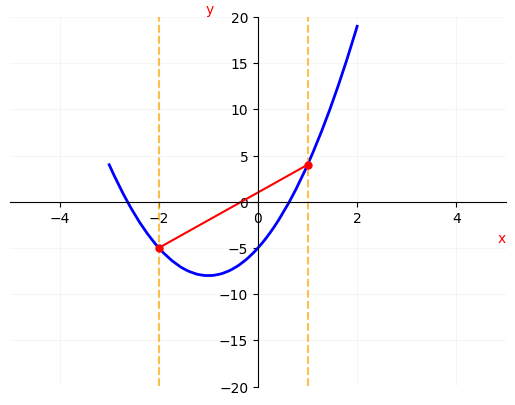

In [ ]:
# adjust the zoom and aspect ratio
ax.set_xbound(-5, 5)
ax.set_ybound(-20, 20)

# Display final figure
display(fig)